# Supervised Learning Capstone

## House Prices: Advanced Regression Techniques

### Description of Data Fields (via Kaggle)

Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

# Introduction

For this capstone project we will be using the Ames, Iowa housing dataset provided by Kaggle here:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

The data consists of 81 total variables, many of which are redundant and/or unnecessary. Our target variable which we are trying to predict is SalePrice. 

We will first examine our features through visualizations, and then do feature engineering. Finally, we will do three iterations of model building:

    1) Simple feature selection based on manual inspection

    2) Feature importances from random forest regression
    
    3) Principal Components Analysis

# Preparing the Data

## Loading the Data

In [1035]:
import sys
import time
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import normaltest
from scipy.special import boxcox1p
from scipy.stats import norm
from scipy.stats import skew
%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)
pd.set_option("display.max_rows", 100)

In [1036]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1037]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1038]:
df_train.shape

(1460, 81)

Before we start, let's drop `Id` since it is unnecessary for our analysis.

In [1039]:
df_train.drop('Id', axis=1, inplace=True)
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Dropping Outliers

The dataset [documentation](http://jse.amstat.org/v19n3/decock.pdf) indicates that there are five outliers that should be removed prior to proceeding with the data (four in the training set). These outliers can be easily seen from the scatter plot of SalePrice vs. GrLivArea. Let's write a simple function that allows us to easily plot a single scatter plot.

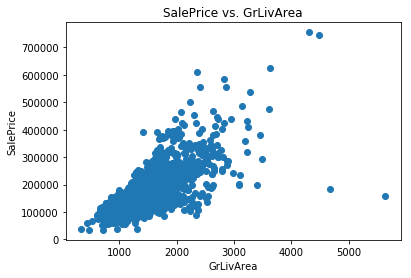

In [1040]:
# Function to easily plot a single scatter plot
def scatter_plot_single(df, target, col):
    plt.scatter(x=df[col], y=df[target])
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(target + ' vs. ' + col)

scatter_plot_single(df_train, 'SalePrice', 'GrLivArea')

We can see the four outliers in question. Two of them are very low-priced houses with a high GrLivArea. The other three simply appear to be expensive houses that are still following the trend. The documentation recommends us to get rid of these outliers before processing the data further, so let's do that.

In [1041]:
# Check shape
df_train.shape

(1460, 80)

In [1042]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000)].index)

# Check shape again
df_train.shape

(1456, 80)

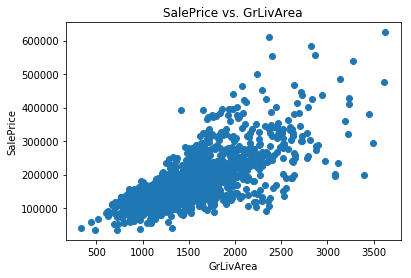

In [1043]:
# Plot again for visual check
scatter_plot_single(df_train, 'SalePrice', 'GrLivArea')

In [1044]:
# Check shape
df_train.shape

(1456, 80)

# Exploring the Data

## Univariate Data

Let's plot the distributions for each of our continuous features. We can write a function to do this.

In [1153]:
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
        'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
        '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

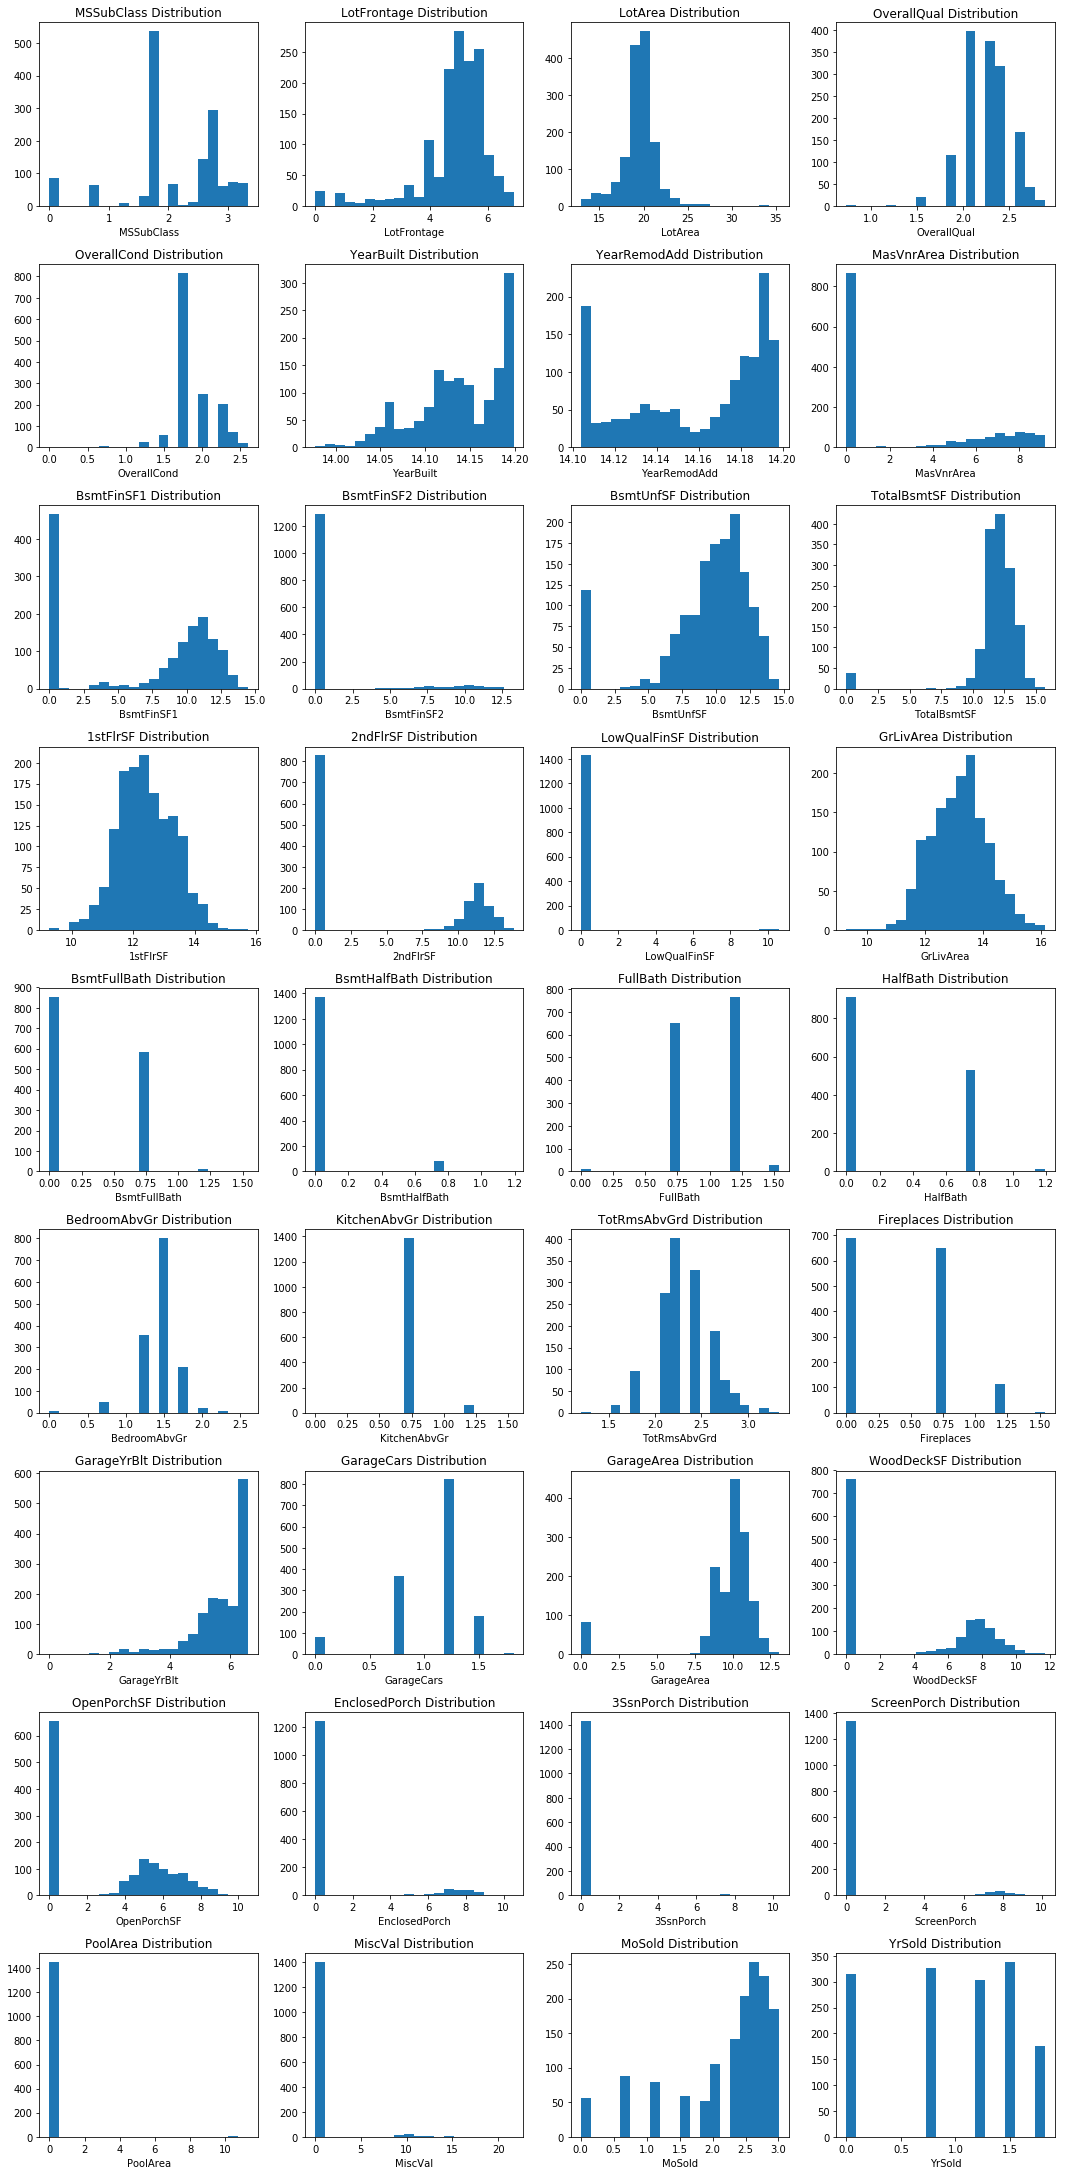

In [1154]:
# Function to neatly plot multiple histograms
def histogram_multiple(df, cols, figsize_x, figsize_y, nrows, ncols):
    i = 1
    plt.figure(figsize=(figsize_x, figsize_y))
    
    for col in cols:
        plt.subplot(nrows,ncols,i)
        plt.hist(df[col], bins=20)
        plt.xlabel(col)
        plt.title(col + ' Distribution')
        i += 1
    
    plt.tight_layout()
    plt.show()

histogram_multiple(df_train, cols, 15, 50, 15, 4)

## Feature-Target Relationships

### Continuous Features

Now let's visualize the relationship between SalePrice and all of our continuous features. We can write a function to easily create a scatter plot for any given x and y with our desired parameters. First let's put all the column names for our continuous variables into a list.

In [1047]:
# Function to easily plot a single scatter plot
def scatter_plot_single(df, target, col):
    plt.scatter(x=df[col], y=df[target])
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(target + ' vs. ' + col)
     
# Function to neatly plot multiple scatter plots
def scatter_plot_multiple(df, target, cols, figsize_x, figsize_y, nrows, ncols):
    i = 1
    plt.figure(figsize=(figsize_x, figsize_y))
    
    for col in cols:
        if col != target:
            plt.subplot(nrows,ncols,i)
            scatter_plot_single(df, target, col)
            i += 1
    
    plt.tight_layout()
    plt.show()

Now we can use this to neatly visualize scatter plots of `SalePrice` with many different input features all in one place. For the amount of features we have, we can use nine rows and four columns.

In [1048]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


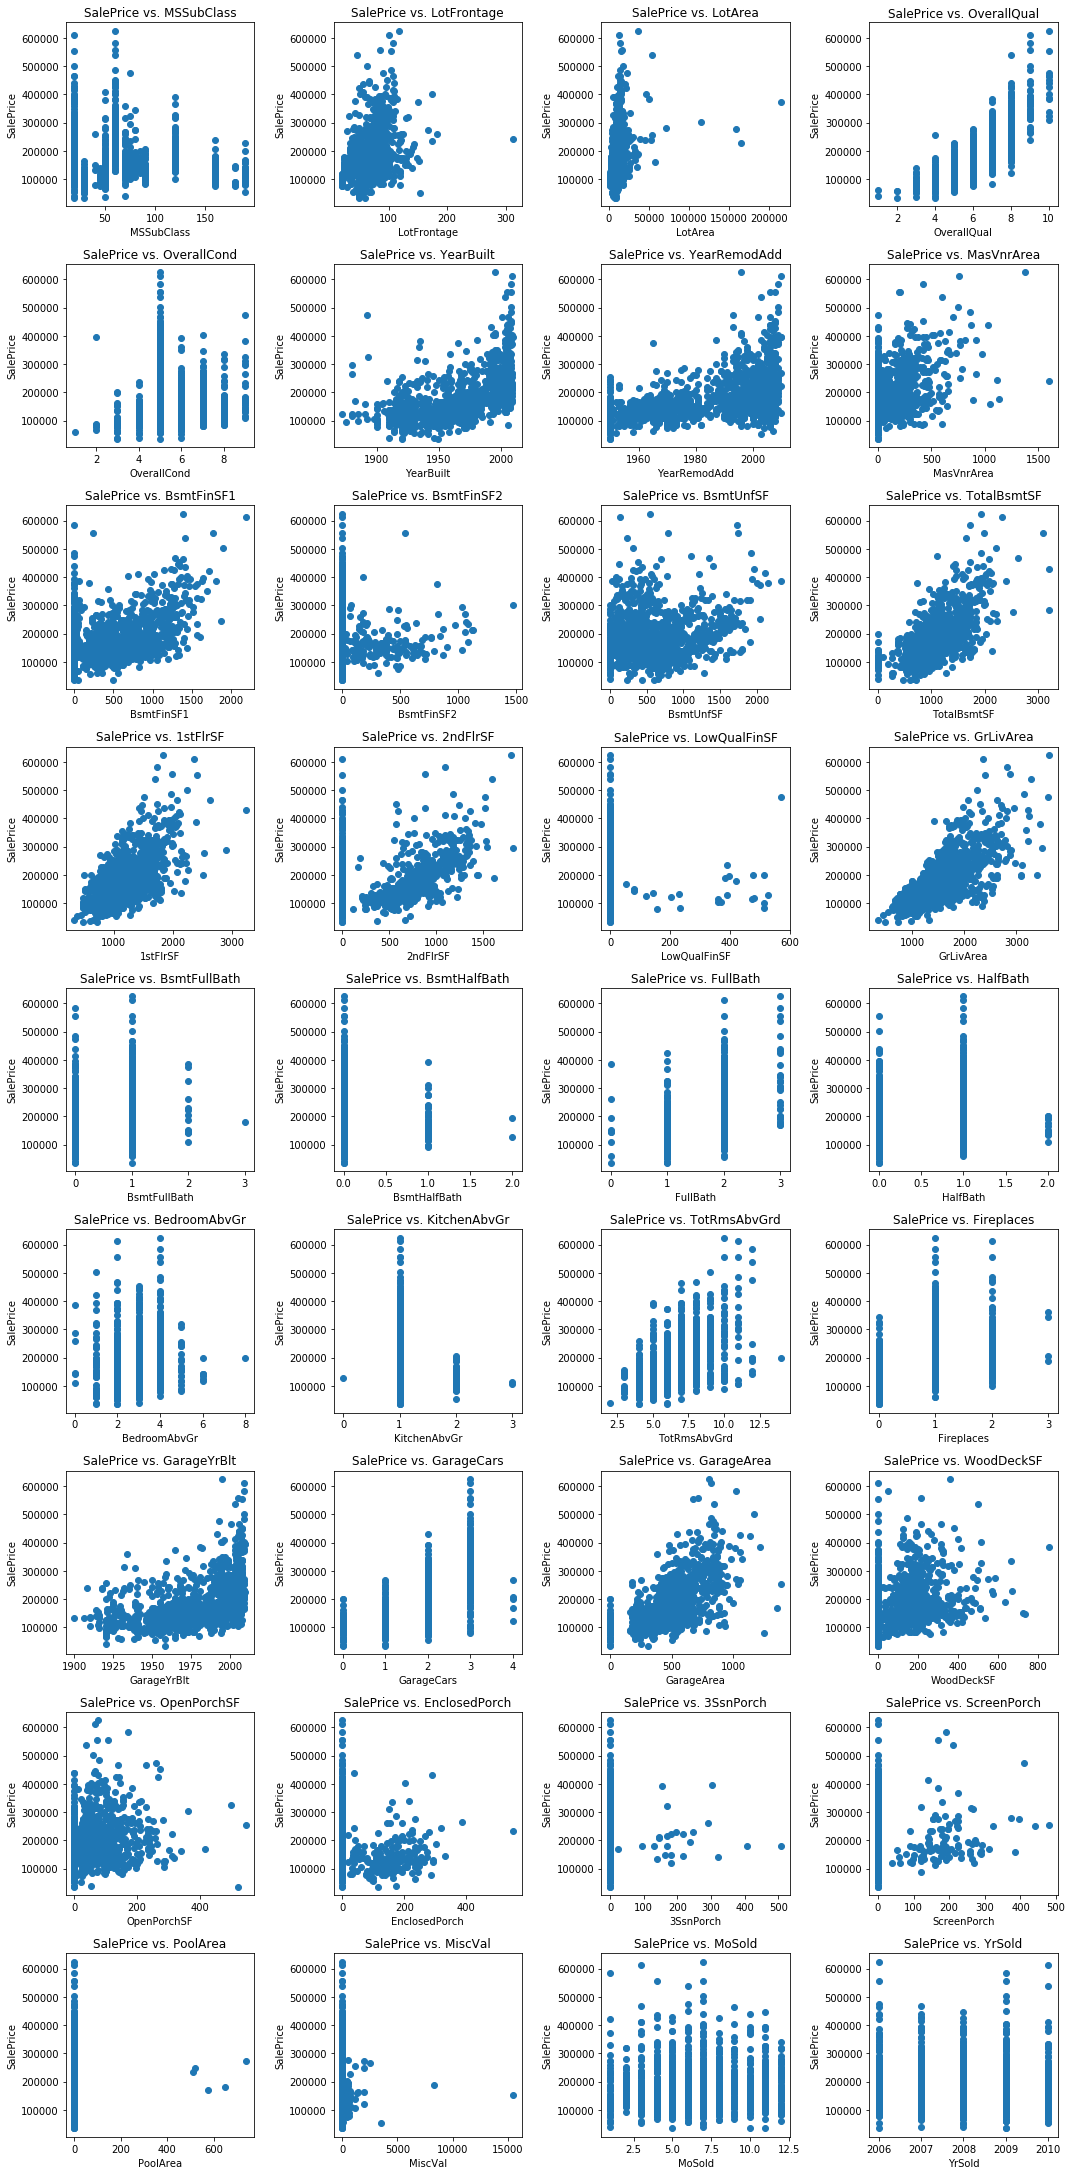

In [1049]:
continuous_feature_names = df_train.select_dtypes(['float64','int64']).columns
scatter_plot_multiple(df_train, 'SalePrice', continuous_feature_names, 15, 50, 15, 4)

The following features exhibit a strong linear relationship with SalePrice:

* LotFrontage
* TotalBsmtSF
* 1stFlrSF
* GrLivArea
* GarageArea

The following features exhibit a weak linear relationship with SalePrice:

* LotArea
* MasVnrArea
* BsmtFinSF1
* BsmtUnfSF
* WoodDeckSF
* OpenPorchSF
* PoolArea

We will transform the nonlinear features in order to linearize them prior to modeling.

### Categorical Features

Now let's visualize some categorical variables to see how they relate to SalePrice. First let's plot a boxplot of SalePrice vs. OverallQual.

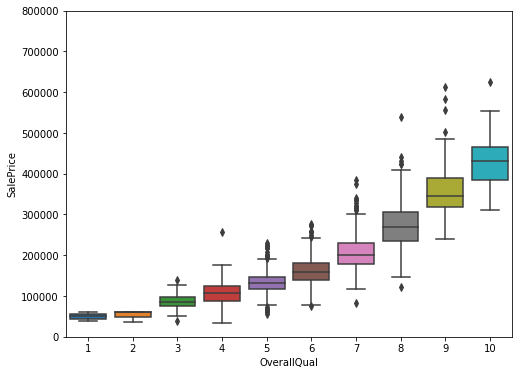

In [1050]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

We can clearly see that as the owner-reported overall quality rating increases, the SalePrice increases as well, which makes sense. We would expect higher-priced homes to be of better quality. Now let's take a look at SalePrice vs. YearBuilt.

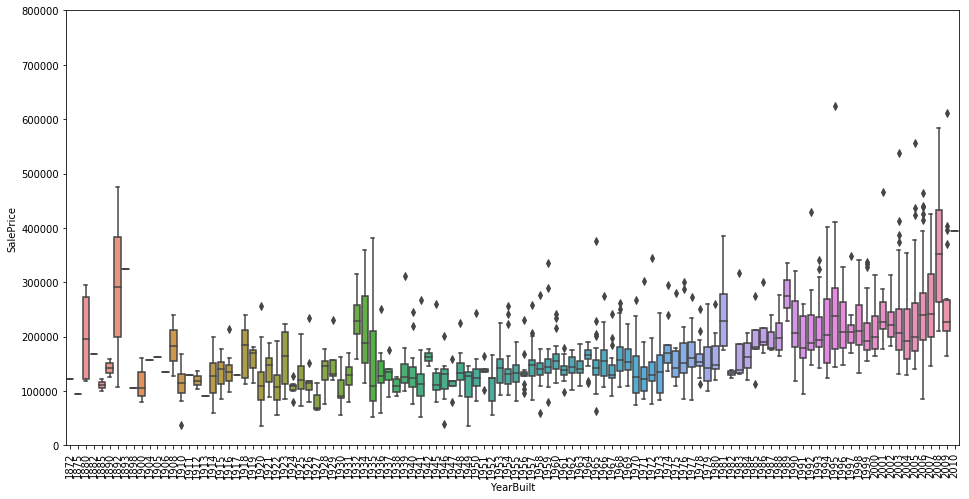

In [1051]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

The home selling price does appear to increase slightly over time, aside from some odd outliers at the far left end of the scale (late 1800s).

Our target variable is `SalePrice`, so our objective will be to predict a home's selling price based on the given input features. We will place an emphasis on feature engineering to maximize model accuracy.

## Analysis of SalePrice

Let's take a closer look at our target variable.

In [1052]:
df_train['SalePrice'].describe()

count      1456.000000
mean     180151.233516
std       76696.592530
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      625000.000000
Name: SalePrice, dtype: float64

In [1053]:
df_train[df_train.SalePrice == df_train.SalePrice.max()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1169,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


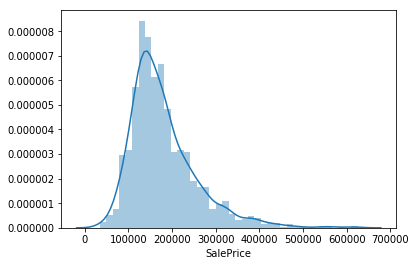

In [1054]:
sns.distplot(df_train['SalePrice']);

`SalePrice` deviates from a normal distribution and appears to be right-skewed. Linear models perform better with normally distributed data, so we should transform this variable. We can use the `numpy.log1p()` function to transform the data so that it is accurate for a wide range of floating point values. This is equivalent to ln(1+p), which allows us to include 0 values.

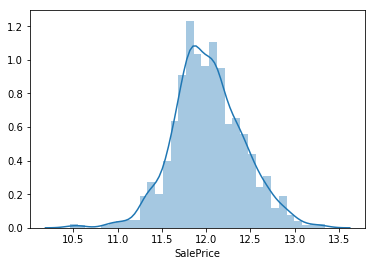

In [1055]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

# Check the distribution again
sns.distplot(df_train['SalePrice']);

## Correlation Heatmap

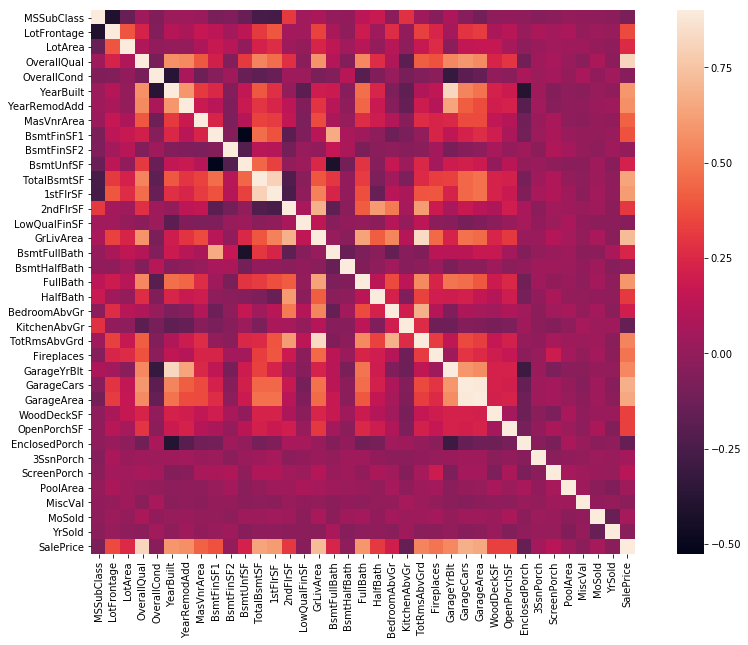

In [1056]:
# Correlation map
corr = df_train.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, vmax=0.8, square=True)

# Feature Engineering

## Handle Missing Values
We will impute the missing values for each feature. First, let's see how many missing values there are.

In [1057]:
# Missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1451,0.996566
MiscFeature,1402,0.962912
Alley,1365,0.937500
Fence,1176,0.807692
FireplaceQu,690,0.473901
LotFrontage,259,0.177885
GarageType,81,0.055632
GarageCond,81,0.055632
GarageFinish,81,0.055632
GarageQual,81,0.055632


### PoolQC, MiscFeature, Alley, Fence, FireplaceQu
Since these features have a significant percentage of null values (>40%), we can safely just drop them entirely.

In [1063]:
df_train = df_train.drop(['PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu'], axis=1)

### LotFrontage
We can assume that homes in the same neighborhood will have similar values for the linear feet of street connected to their property. Thus, we can use `groupby` to group according to neighborhood and fill in the missing values with the median LotFrontage.

In [1064]:
df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_train['LotFrontage'].describe()
#df_train = df_train.drop(['LotFrontage'], axis=1)

count    1456.000000
mean       69.895948
std        21.331035
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

### GarageType, GarageCond, GarageFinish, GarageQual, GarageYrBlt
For each of the categorical garage features, we can fill in the missing values with 'None', since it indicates no garage.

In [1065]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt']:
    df_train[col] = df_train[col].fillna('None')

### BsmtQual, BsmtCond, BsmtFinType1
For these three basement features, we can fill in the missing values with 'None'.

In [1066]:
for col in ['BsmtQual', 'BsmtCond', 'BsmtFinType1']:
    df_train[col] = df_train[col].fillna('None')

###  BsmtFinType2, BsmtExposure
For these two basement features, we can fill in the missing values with 'None'.

In [1067]:
for col in ['BsmtFinType2', 'BsmtExposure']:
    df_train[col] = df_train[col].fillna('None')

### MasVnrArea
A value of NaN means no masonry veneer for the home, so we can fill in missing values with 0.

In [1068]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)

### MsVnrType
A value of NaN means no masonry veneer for the home, so we can fill in missing values with 'None'.

In [1069]:
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')

### Utilities
All of the values are 'AllPub' except for three of them. Therefore, this feature will not be useful for modeling, and we can safely drop it.

In [1070]:
df_train = df_train.drop(['Utilities'], axis=1)

### Functional
According to the data description, a value of NaN means typical. Thus, we can replace missing values with 'Typ'.

In [1071]:
df_train['Functional'] = df_train['Functional'].fillna('Typ')

### Electrical
There is only one NaN value, so we can replace it with the most frequently occurring value, 'SBrkr'.

In [1072]:
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [1073]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

,Total,Percent
SalePrice,0,0.0
RoofStyle,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0
BsmtQual,0,0.0


In [1074]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.00000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,56.888736,69.895948,10448.784341,6.088599,5.576236,1971.18544,1984.819368,101.526786,436.991071,46.677198,...,93.833791,46.221154,22.014423,3.418956,15.102335,2.055632,43.608516,6.326236,2007.817308,12.021950
std,42.358363,21.331035,9860.763449,1.369669,1.113966,30.20159,20.652143,177.011773,430.255052,161.522376,...,125.192349,65.352424,61.192248,29.357056,55.828405,35.383772,496.799265,2.698356,1.329394,0.396077
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.00000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271
25%,20.000000,60.000000,7538.750000,5.000000,5.000000,1954.00000,1966.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.774528
50%,50.000000,70.000000,9468.500000,6.000000,5.000000,1972.00000,1993.500000,0.000000,381.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001512
75%,70.000000,80.000000,11588.000000,7.000000,6.000000,2000.00000,2004.000000,163.250000,706.500000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273736
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.00000,2010.000000,1600.000000,2188.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.345509


### Label Encoding Categorical Features
Since there are categorical features that depend on ordering (such as YrSold), we can encode all the categorical features using label encoding, which accounts for ordering.

In [1156]:
# Convert some numerical features to categorical
for col in ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']:
    df_train[col] = df_train[col].apply(str)

In [1078]:
print(df_train.dtypes)

MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond       object
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object


In [1079]:
cols = ['MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
        'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

# Apply LabelEncoder to categorical features
for col in cols:
    le = LabelEncoder() 
    le.fit(list(df_train[col].values)) 
    df_train[col] = le.transform(list(df_train[col].values))

### Add TotalSF Feature
Let's add a feature for the total square footage.

In [1080]:
# Add feature for total square footage
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']

### Transform Skewed Features

In order to transform the features which deviate from a normal distribution, we must use a transformation. A log transformation is a possibility, but I decided to settle on the box-cox transformation, which is more flexible.

In [1081]:
# Create a DataFrame of numerical features
numeric_features = df_train.dtypes[df_train.dtypes != 'object'].index

# Check the skew of numerical features
skewed_features = df_train[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_features})
skewness.head(10)

,Skew
MiscVal,24.418175
PoolArea,17.504556
Condition2,13.666839
LotArea,12.574590
3SsnPorch,10.279262
Heating,9.831083
LowQualFinSF,8.989291
RoofMatl,8.293646
LandSlope,4.801326
KitchenAbvGr,4.476748


In [1082]:
# Include features that have a skewness greater than 0.75
skewness = skewness[abs(skewness) > 0.75]
print('Total skewed features: {}'.format(skewness.shape[0]))

skewed_features = skewness.index
alpha = 0.15
for feature in skewed_features:
    df_train[feature] = boxcox1p(df_train[feature], alpha)

Total skewed features: 75


In [1083]:
# Convert categorical variable into dummy
df_train = pd.get_dummies(df_train)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,2.750250,1.540963,4.882973,19.212182,0.730463,1.540963,1.540963,1.820334,0.0,2.055642,...,0.0,0.0,0.0,0.0,1.820334,1.194318,2.602594,1.820334,3.156009,14.976591
1,1.820334,1.540963,5.527074,19.712205,0.730463,1.540963,1.540963,1.194318,0.0,4.137711,...,0.0,0.0,0.0,0.0,2.440268,0.730463,2.602594,1.820334,3.140516,14.923100
2,2.750250,1.540963,5.053371,20.347241,0.730463,0.000000,1.540963,1.820334,0.0,2.055642,...,0.0,0.0,0.0,0.0,3.011340,1.194318,2.602594,1.820334,3.163719,15.149678
3,2.885846,1.540963,4.545286,19.691553,0.730463,0.000000,1.540963,0.000000,0.0,2.259674,...,0.0,0.0,0.0,0.0,1.820334,0.000000,2.602594,0.000000,3.111134,14.857121
4,2.750250,1.540963,5.653921,21.325160,0.730463,0.000000,1.540963,1.194318,0.0,3.438110,...,0.0,0.0,0.0,0.0,1.540963,1.194318,2.602594,1.820334,3.176081,15.852312


In [1084]:
df_train.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,2.120462,1.532216,4.838973,19.545432,0.727453,1.006929,1.439999,1.403936,0.043274,2.993064,...,0.131088,0.624309,0.036790,0.403946,2.211254,0.988608,2.478930,1.703198,3.130140,14.834646
std,0.804227,0.242085,1.198320,2.025558,0.046811,0.720319,0.338967,0.712903,0.186299,0.799155,...,1.023859,2.137374,0.627302,2.153524,0.740955,0.623489,0.465932,0.475669,0.044712,0.980603
min,0.000000,0.000000,0.000000,12.878993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.944763,9.279836
25%,1.820334,1.540963,4.545286,18.773051,0.730463,0.000000,1.540963,1.194318,0.000000,2.440268,...,0.000000,0.000000,0.000000,0.000000,2.055642,0.730463,2.602594,1.820334,3.102566,14.195323
50%,2.055642,1.540963,5.133567,19.657692,0.730463,1.540963,1.540963,1.820334,0.000000,3.128239,...,0.000000,0.000000,0.000000,0.000000,2.440268,1.194318,2.602594,1.820334,3.128410,14.855815
75%,2.750250,1.540963,5.527074,20.467446,0.730463,1.540963,1.540963,1.820334,0.000000,3.618223,...,0.000000,0.000000,0.000000,0.000000,2.750250,1.540963,2.602594,1.820334,3.158902,15.488874
max,3.340760,1.820334,6.899104,35.391371,0.730463,1.540963,1.540963,1.820334,1.194318,4.137711,...,10.312501,10.169007,11.289160,21.677435,3.011340,1.820334,2.602594,2.055642,3.274014,18.172113


# Modeling
For our modeling, we will do three iterations:
* Full feature set
* Reduced feature set
* PCA

In each iteration, we will create five models:

* Linear Regression
* KNN Regression
* Random Forest Regresion
* Ridge Regression
* Lasso Regression

We will generate an accuracy score for each of the models and determine which model most accurately predicts our target variable, SalePrice. For iterations 1 and 2, we will use `GridSearchCV` to determine the best set of parameters for our model, and for iteration 3, we will use `pipe` to chain together PCA with our regression model.

In [1085]:
X = df_train.drop(['SalePrice'], axis=1)
y = df_train.loc[:, ['SalePrice']]

In [1086]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,2.750250,1.540963,4.882973,19.212182,0.730463,1.540963,1.540963,1.820334,0.0,2.055642,...,0.000000,0.0,0.0,0.0,0.0,1.820334,1.194318,2.602594,1.820334,14.976591
1,1.820334,1.540963,5.527074,19.712205,0.730463,1.540963,1.540963,1.194318,0.0,4.137711,...,0.000000,0.0,0.0,0.0,0.0,2.440268,0.730463,2.602594,1.820334,14.923100
2,2.750250,1.540963,5.053371,20.347241,0.730463,0.000000,1.540963,1.820334,0.0,2.055642,...,0.000000,0.0,0.0,0.0,0.0,3.011340,1.194318,2.602594,1.820334,15.149678
3,2.885846,1.540963,4.545286,19.691553,0.730463,0.000000,1.540963,0.000000,0.0,2.259674,...,8.797736,0.0,0.0,0.0,0.0,1.820334,0.000000,2.602594,0.000000,14.857121
4,2.750250,1.540963,5.653921,21.325160,0.730463,0.000000,1.540963,1.194318,0.0,3.438110,...,0.000000,0.0,0.0,0.0,0.0,1.540963,1.194318,2.602594,1.820334,15.852312


In [1087]:
X.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,2.120462,1.532216,4.838973,19.545432,0.727453,1.006929,1.439999,1.403936,0.043274,2.993064,...,1.041125,0.131088,0.624309,0.036790,0.403946,2.211254,0.988608,2.478930,1.703198,14.834646
std,0.804227,0.242085,1.198320,2.025558,0.046811,0.720319,0.338967,0.712903,0.186299,0.799155,...,2.589720,1.023859,2.137374,0.627302,2.153524,0.740955,0.623489,0.465932,0.475669,0.980603
min,0.000000,0.000000,0.000000,12.878993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.279836
25%,1.820334,1.540963,4.545286,18.773051,0.730463,0.000000,1.540963,1.194318,0.000000,2.440268,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.055642,0.730463,2.602594,1.820334,14.195323
50%,2.055642,1.540963,5.133567,19.657692,0.730463,1.540963,1.540963,1.820334,0.000000,3.128239,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.440268,1.194318,2.602594,1.820334,14.855815
75%,2.750250,1.540963,5.527074,20.467446,0.730463,1.540963,1.540963,1.820334,0.000000,3.618223,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.750250,1.540963,2.602594,1.820334,15.488874
max,3.340760,1.820334,6.899104,35.391371,0.730463,1.540963,1.540963,1.820334,1.194318,4.137711,...,10.524981,10.312501,10.169007,11.289160,21.677435,3.011340,1.820334,2.602594,2.055642,18.172113


In [1088]:
y.head()

,SalePrice
0,3.156009
1,3.140516
2,3.163719
3,3.111134
4,3.176081


## Iteration 1 - All Original Features
In this iteration, we will run our models with the full feature set.

In [1089]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Linear Regression

In [1090]:
# Instantiate model and create parameter grid
lr = linear_model.LinearRegression()
grid_params = {'fit_intercept': [True, False],
               'normalize': [True, False], 
               'copy_X' : [True, False]}

In [1091]:
# Instantiate new grid
grid = GridSearchCV(lr, grid_params, n_jobs=-1, cv=5)

In [1092]:
# Linear Regression
start = time.time()
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
print('Runtime for grid search: {0:.3} s'.format((time.time() - start)))
print('Best Accuracy Score: \n{}'.format(grid.best_score_))
print('Best Parameters: \n{}'.format(grid.best_params_))

Runtime for grid search: 11.0 s
Best Accuracy Score: 
0.9038859588435272
Best Parameters: 
{'copy_X': True, 'fit_intercept': False, 'normalize': True}


In [1093]:
# Instantiate and fit model with best parameters
lr = LinearRegression(fit_intercept=False, normalize=True, copy_X=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Run cross validation and calculate RMSE
scores = cross_val_score(lr, X_train, y_train, cv=5)

# Print results
print('Score With 20% Holdout:\n{0:.2%}'.format(lr.score(X_test, y_test)))
print('Cross Validation Scores:\n', scores)
print('Average Cross Validation Score:\n{0:.2%}'.format(scores.mean()))

# Calculate root mean squared error
rmse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))**0.5

# Print result
print('Root Mean Squared Error:\n{}'.format(rmse))

Score With 20% Holdout:
90.03%
Cross Validation Scores:
 [0.88870071 0.90088601 0.91468823 0.92236951 0.89273748]
Average Cross Validation Score:
90.39%
Root Mean Squared Error:
0.30628900378557106


### KNN Regression

In [1094]:
# Instantiate model and create parameter grid
knn = neighbors.KNeighborsRegressor()
grid_params = {'n_neighbors': list(range(1, 10)),
               'weights': ['uniform', 'distance'], 
               'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [1095]:
# Instantiate new grid
grid = GridSearchCV(knn, grid_params, n_jobs=-1, cv=5)

In [1096]:
# KNN Regression
start = time.time()
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

# Print results
print('Runtime for grid search: {0:.3} s'.format((time.time() - start)))
print('Best Accuracy Score: \n{}'.format(grid.best_score_))
print('Best Parameters: \n{}'.format(grid.best_params_))

Runtime for grid search: 12.2 s
Best Accuracy Score: 
0.6595538969910677
Best Parameters: 
{'algorithm': 'brute', 'n_neighbors': 6, 'weights': 'distance'}


In [1097]:
# Instantiate and fit model with best parameters
knn = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Run cross validation and calculate RMSE
scores = cross_val_score(knn, X_train, y_train, cv=5)

# Print results
print('Score With 20% Holdout:\n{0:.2%}'.format(knn.score(X_test, y_test)))
print('Cross Validation Scores:\n', scores)
print('Average Cross Validation Score:\n{0:.2%}'.format(scores.mean()))

# Calculate root mean squared error
rmse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))**0.5

# Print result
print('Root Mean Squared Error:\n{}'.format(rmse))

Score With 20% Holdout:
62.46%
Cross Validation Scores:
 [0.64736072 0.64168616 0.65754486 0.67426629 0.65346698]
Average Cross Validation Score:
65.49%
Root Mean Squared Error:
0.612165517811808


### Random Forest Regression

In [1098]:
# Instantiate model and create parameter grid
rfr = RandomForestRegressor()
grid_params = {'n_estimators': list(range(1, 10)),
               'criterion': ['mse', 'mae'],
               'max_depth': list(range(1, 10))}

In [1099]:
# Instantiate new grid
grid = GridSearchCV(rfr, grid_params, n_jobs=-1, cv=5)

In [1100]:
# KNN Regression
start = time.time()
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

# Print results
print('Runtime for grid search: {0:.3} s'.format((time.time() - start)))
print('Best Accuracy Score: \n{}'.format(grid.best_score_))
print('Best Parameters: \n{}'.format(grid.best_params_))

Runtime for grid search: 1.85e+02 s
Best Accuracy Score: 
0.8628202929561456
Best Parameters: 
{'criterion': 'mse', 'max_depth': 9, 'n_estimators': 8}


/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [1101]:
# Instantiate and fit model with best parameters
rfr = RandomForestRegressor(n_estimators=9, criterion='mse', max_depth=9)
rfr.fit(X_train, y_train.values.ravel())
y_pred = rfr.predict(X_test)

# Run cross validation and calculate RMSE
scores = cross_val_score(rfr, X_train, y_train.values.ravel(), cv=5)

# Print results
print('Score With 20% Holdout:\n{0:.2%}'.format(rfr.score(X_test, y_test.values.ravel())))
print('Cross Validation Scores:\n{}'.format(scores))
print('Average Cross Validation Score:\n{0:.2%}'.format(scores.mean()))

# Calculate root mean squared error
rmse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))**0.5

# Print result
print('Root Mean Squared Error:\n{}'.format(rmse))

Score With 20% Holdout:
85.10%
Cross Validation Scores:
[0.84404563 0.85909811 0.87318738 0.88366671 0.84070214]
Average Cross Validation Score:
86.01%
Root Mean Squared Error:
0.37838092392711603


### Ridge Regression

In [1102]:
# Instantiate model and create parameter grid
rr = Ridge()
grid_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100], 
               'fit_intercept': [True, False],
               'solver': ['cholesky', 'lsqr', 'sparse_cg']}
#               'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [1103]:
# Instantiate new grid
grid = GridSearchCV(rr, grid_params, n_jobs=-1, cv=5)

In [1104]:
# Ridge Regression
start = time.time()
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

# Print results
print('Runtime for grid search: {0:.3} s'.format((time.time() - start)))
print('Best Accuracy Score: \n{}'.format(grid.best_score_))
print('Best Parameters: \n{}'.format(grid.best_params_))

Runtime for grid search: 3.84 s
Best Accuracy Score: 
0.9047617389686792
Best Parameters: 
{'alpha': 1, 'fit_intercept': False, 'solver': 'cholesky'}


In [1105]:
# Instantiate and fit model with best parameters
rr = Ridge(alpha=1, fit_intercept=False, solver='cholesky')
rr.fit(X_train, y_train)
y_pred = rr.predict(X_test)

# Run cross validation and calculate RMSE
scores = cross_val_score(rr, X_train, y_train, cv=5)

# Print results
print('Score With 20% Holdout:\n{0:.2%}'.format(rr.score(X_test, y_test)))
print('Cross Validation Scores:\n{}'.format(scores))
print('Average Cross Validation Score:\n{0:.2%}'.format(scores.mean()))

# Calculate root mean squared error
rmse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))**0.5

# Print result
print('Root Mean Squared Error:\n{}'.format(rmse))

Score With 20% Holdout:
90.06%
Cross Validation Scores:
[0.8875597  0.90103579 0.91604279 0.92492845 0.89419661]
Average Cross Validation Score:
90.48%
Root Mean Squared Error:
0.3062108626753103


### Lasso Regression

In [1106]:
# Instantiate model and create parameter grid
lasso = Lasso()
grid_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100], 
               'fit_intercept': [True, False],
               'max_iter': list(range(10))}
#               'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [1107]:
# Instantiate new grid
grid = GridSearchCV(lasso, grid_params, n_jobs=-1, cv=5)

In [1108]:
# Ridge Regression
start = time.time()
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

# Print results
print('Runtime for grid search: {0:.3} s'.format((time.time() - start)))
print('Best Accuracy Score: \n{}'.format(grid.best_score_))
print('Best Parameters: \n{}'.format(grid.best_params_))

Runtime for grid search: 11.0 s
Best Accuracy Score: 
0.8898671924495875
Best Parameters: 
{'alpha': 0.0001, 'fit_intercept': True, 'max_iter': 9}


/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13095565812133875, tolerance: 0.0002336781715295783
  positive)


In [1109]:
# Instantiate and fit model with best parameters
lasso = Lasso(alpha=0.0001, fit_intercept=True, max_iter=9)
lasso.fit(X_train, y_train)
y_pred = rr.predict(X_test)

# Run cross validation and calculate RMSE
scores = cross_val_score(lasso, X_train, y_train, cv=5)

# Print results
print('Score With 20% Holdout:\n{0:.2%}'.format(rr.score(X_test, y_test)))
print('Cross Validation Scores:\n{}'.format(scores))
print('Average Cross Validation Score:\n{0:.2%}'.format(scores.mean()))

# Calculate root mean squared error
rmse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))**0.5

# Print result
print('Root Mean Squared Error:\n{}'.format(rmse))

Score With 20% Holdout:
90.06%
Cross Validation Scores:
[0.87973372 0.87451241 0.90024551 0.91381628 0.88098994]
Average Cross Validation Score:
88.99%
Root Mean Squared Error:
0.3062108626753103


/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13095565812133875, tolerance: 0.0002336781715295783
  positive)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10424985154274628, tolerance: 0.00019337793314266012
  positive)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10145213039752624, tolerance: 0.0001859706045300572
  positive)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not c

Our best model in this iteration was Ridge Regression with an accuracy score of 90.06% and an RMSE of 0.30621.

## Iteration 2 - Feature Importances
In this iteration, we will use the feature importances from our Random Forest Regressor and extract the 20 most important features. Then, we will re-run all the models above on the reduced feature set.

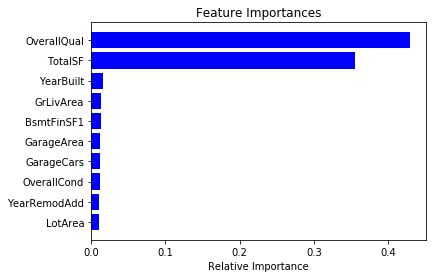

In [1110]:
features = X.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [1111]:
feature_importances = pd.DataFrame(rfr.feature_importances_, index = X.columns, 
                                   columns=['importance']).sort_values('importance',ascending=False)

feature_importances.head(20)

,importance
OverallQual,0.429685
TotalSF,0.355861
YearBuilt,0.015554
GrLivArea,0.013061
BsmtFinSF1,0.012794
GarageArea,0.011899
GarageCars,0.011873
OverallCond,0.011585
YearRemodAdd,0.011061
LotArea,0.010480


In [1112]:
X_reduced = X[['OverallQual', 'TotalSF', 'YearRemodAdd', 'GarageArea', 'CentralAir', 'GrLivArea', 
               'BsmtFinSF1', 'OverallCond', 'LotArea', 'GarageCond', 'YearBuilt', 'MSZoning', 
               '1stFlrSF', 'BsmtUnfSF', 'GarageType', 'GarageCars', 'BsmtFinType1', 'LotFrontage', 
               'BsmtQual', 'GarageYrBlt']]

X_reduced.head()

,OverallQual,TotalSF,YearRemodAdd,GarageArea,CentralAir,GrLivArea,BsmtFinSF1,OverallCond,LotArea,GarageCond,YearBuilt,MSZoning,1stFlrSF,BsmtUnfSF,GarageType,GarageCars,BsmtFinType1,LotFrontage,BsmtQual,GarageYrBlt
0,2.440268,14.976591,14.187527,10.506271,0.730463,13.698888,11.170327,1.820334,19.212182,2.055642,14.187527,1.540963,11.692623,7.483296,0.730463,1.194318,1.194318,4.882973,1.194318,6.426513
1,2.259674,14.923100,14.145138,10.062098,0.730463,12.792276,12.062832,2.440268,19.712205,2.055642,14.145138,1.540963,12.792276,8.897844,0.730463,1.194318,0.000000,5.527074,1.194318,5.744420
2,2.440268,15.149678,14.185966,10.775536,0.730463,13.832085,10.200343,1.820334,20.347241,2.055642,14.184404,1.540963,11.892039,9.917060,0.730463,1.194318,1.194318,5.053371,1.194318,6.382451
3,2.440268,14.857121,14.135652,10.918253,0.730463,13.711364,8.274266,1.820334,19.691553,2.055642,14.047529,1.540963,12.013683,10.468500,2.055642,1.540963,0.000000,4.545286,1.820334,6.314735
4,2.602594,15.852312,14.182841,11.627708,0.730463,14.480029,10.971129,1.820334,21.325160,2.055642,14.182841,1.540963,12.510588,10.221051,0.730463,1.540963,1.194318,5.653921,1.194318,6.360100


In [1113]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2)

### Linear Regression

In [1114]:
# Instantiate model and create parameter grid
lr = linear_model.LinearRegression()
grid_params = {'fit_intercept': [True, False],
               'normalize': [True, False], 
               'copy_X' : [True, False]}

In [1115]:
# Instantiate new grid
grid = GridSearchCV(lr, grid_params, n_jobs=-1, cv=5)

In [1116]:
# Linear Regression
start = time.time()
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
print('Runtime for grid search: {0:.3} s'.format((time.time() - start)))
print('Best Accuracy Score: \n{}'.format(grid.best_score_))
print('Best Parameters: \n{}'.format(grid.best_params_))

Runtime for grid search: 0.568 s
Best Accuracy Score: 
0.8815714122815158
Best Parameters: 
{'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [1117]:
# Instantiate and fit model with best parameters
lr = LinearRegression(fit_intercept=False, normalize=True, copy_X=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Run cross validation and calculate RMSE
scores = cross_val_score(lr, X_train, y_train, cv=5)

# Print results
print('Score With 20% Holdout:\n{0:.2%}'.format(lr.score(X_test, y_test)))
print('Cross Validation Scores:\n', scores)
print('Average Cross Validation Score:\n{0:.2%}'.format(scores.mean()))

# Calculate root mean squared error
rmse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))**0.5

# Print result
print('Root Mean Squared Error:\n{}'.format(rmse))

Score With 20% Holdout:
91.45%
Cross Validation Scores:
 [0.86964536 0.90312406 0.87734731 0.86610569 0.88772752]
Average Cross Validation Score:
88.08%
Root Mean Squared Error:
0.3011926609631838


### KNN Regression

In [1118]:
# Instantiate model and create parameter grid
knn = neighbors.KNeighborsRegressor()
grid_params = {'n_neighbors': list(range(1, 10)),
               'weights': ['uniform', 'distance'], 
               'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [1119]:
# Instantiate new grid
grid = GridSearchCV(knn, grid_params, n_jobs=-1, cv=5)

In [1120]:
# KNN Regression
start = time.time()
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

# Print results
print('Runtime for grid search: {0:.3} s'.format((time.time() - start)))
print('Best Accuracy Score: \n{}'.format(grid.best_score_))
print('Best Parameters: \n{}'.format(grid.best_params_))

Runtime for grid search: 4.46 s
Best Accuracy Score: 
0.7573965453742735
Best Parameters: 
{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}


In [1121]:
# Instantiate and fit model with best parameters
knn = neighbors.KNeighborsRegressor(n_neighbors=7, weights='distance', algorithm='auto')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Run cross validation and calculate RMSE
scores = cross_val_score(knn, X_train, y_train, cv=5)

# Print results
print('Score With 20% Holdout:\n{0:.2%}'.format(knn.score(X_test, y_test)))
print('Cross Validation Scores:\n', scores)
print('Average Cross Validation Score:\n{0:.2%}'.format(scores.mean()))

# Calculate root mean squared error
rmse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))**0.5

# Print result
print('Root Mean Squared Error:\n{}'.format(rmse))

Score With 20% Holdout:
80.35%
Cross Validation Scores:
 [0.7559988  0.81061274 0.72753457 0.75354858 0.73920998]
Average Cross Validation Score:
75.74%
Root Mean Squared Error:
0.4564285807903383


### Random Forest Regression

In [1122]:
# Instantiate model and create parameter grid
rfr = RandomForestRegressor()
grid_params = {'n_estimators': list(range(1, 10)),
               'criterion': ['mse', 'mae'],
               'max_depth': list(range(1, 10))}

In [1123]:
# Instantiate new grid
grid = GridSearchCV(rfr, grid_params, n_jobs=-1, cv=5)

In [1124]:
# KNN Regression
start = time.time()
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

# Print results
print('Runtime for grid search: {0:.3} s'.format((time.time() - start)))
print('Best Accuracy Score: \n{}'.format(grid.best_score_))
print('Best Parameters: \n{}'.format(grid.best_params_))

Runtime for grid search: 70.4 s
Best Accuracy Score: 
0.8517071234529742
Best Parameters: 
{'criterion': 'mse', 'max_depth': 9, 'n_estimators': 8}


/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [1125]:
# Instantiate and fit model with best parameters
rfr = RandomForestRegressor(n_estimators=9, criterion='mse', max_depth=8)
rfr.fit(X_train, y_train.values.ravel())
y_pred = rfr.predict(X_test)

# Run cross validation and calculate RMSE
scores = cross_val_score(rfr, X_train, y_train.values.ravel(), cv=5)

# Print results
print('Score With 20% Holdout:\n{0:.2%}'.format(rfr.score(X_test, y_test.values.ravel())))
print('Cross Validation Scores:\n{}'.format(scores))
print('Average Cross Validation Score:\n{0:.2%}'.format(scores.mean()))

# Calculate root mean squared error
rmse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))**0.5

# Print result
print('Root Mean Squared Error:\n{}'.format(rmse))

Score With 20% Holdout:
87.90%
Cross Validation Scores:
[0.84591098 0.86758539 0.85590976 0.82783851 0.84731086]
Average Cross Validation Score:
84.89%
Root Mean Squared Error:
0.3571122712911688


### Ridge Regression

In [1126]:
# Instantiate model and create parameter grid
rr = Ridge()
grid_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100], 
               'fit_intercept': [True, False],
               'solver': ['cholesky', 'lsqr', 'sparse_cg']}
#               'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [1127]:
# Instantiate new grid
grid = GridSearchCV(rr, grid_params, n_jobs=-1, cv=5)

In [1128]:
# Ridge Regression
start = time.time()
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

# Print results
print('Runtime for grid search: {0:.3} s'.format((time.time() - start)))
print('Best Accuracy Score: \n{}'.format(grid.best_score_))
print('Best Parameters: \n{}'.format(grid.best_params_))

Runtime for grid search: 2.3 s
Best Accuracy Score: 
0.8816035431498964
Best Parameters: 
{'alpha': 0.01, 'fit_intercept': True, 'solver': 'cholesky'}


/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [1149]:
# Instantiate and fit model with best parameters
rr = Ridge(alpha=0.01, fit_intercept=True, solver='cholesky')
rr.fit(X_train, y_train)
y_pred = rr.predict(X_test)

# Run cross validation and calculate RMSE
scores = cross_val_score(rr, X_train, y_train, cv=5)

# Print results
print('Score With 20% Holdout:\n{0:.2%}'.format(rr.score(X_test, y_test)))
print('Cross Validation Scores:\n{}'.format(scores))
print('Average Cross Validation Score:\n{0:.2%}'.format(scores.mean()))

# Calculate root mean squared error
rmse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))**0.5

# Print result
print('Root Mean Squared Error:\n{}'.format(rmse))

Score With 20% Holdout:
90.10%
Cross Validation Scores:
[0.90876598 0.91318546 0.89388285 0.88931054 0.8936684 ]
Average Cross Validation Score:
89.98%
Root Mean Squared Error:
0.3149498700624098


### Lasso Regression

In [1130]:
# Instantiate model and create parameter grid
lasso = Lasso()
grid_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100], 
               'fit_intercept': [True, False],
               'max_iter': list(range(10))}
#               'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [1131]:
# Instantiate new grid
grid = GridSearchCV(lasso, grid_params, n_jobs=-1, cv=5)

In [1132]:
# Ridge Regression
start = time.time()
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

# Print results
print('Runtime for grid search: {0:.3} s'.format((time.time() - start)))
print('Best Accuracy Score: \n{}'.format(grid.best_score_))
print('Best Parameters: \n{}'.format(grid.best_params_))

Runtime for grid search: 8.92 s
Best Accuracy Score: 
0.8717199839344799
Best Parameters: 
{'alpha': 0.0001, 'fit_intercept': True, 'max_iter': 9}


/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1345447112339042, tolerance: 0.0002292111729539456
  positive)


In [1150]:
# Instantiate and fit model with best parameters
lasso = Lasso(alpha=0.0001, fit_intercept=True, max_iter=9)
lasso.fit(X_train, y_train)
y_pred = rr.predict(X_test)

# Run cross validation and calculate RMSE
scores = cross_val_score(lasso, X_train, y_train, cv=5)

# Print results
print('Score With 20% Holdout:\n{0:.2%}'.format(rr.score(X_test, y_test)))
print('Cross Validation Scores:\n{}'.format(scores))
print('Average Cross Validation Score:\n{0:.2%}'.format(scores.mean()))

# Calculate root mean squared error
rmse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))**0.5

# Print result
print('Root Mean Squared Error:\n{}'.format(rmse))

Score With 20% Holdout:
90.10%
Cross Validation Scores:
[0.90610849 0.89638496 0.88806663 0.87695657 0.88558265]
Average Cross Validation Score:
89.06%
Root Mean Squared Error:
0.3149498700624098


/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12588123641539328, tolerance: 0.000230805802977206
  positive)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10174824166285584, tolerance: 0.00018211493454537317
  positive)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10071330950203666, tolerance: 0.00018551750660764676
  positive)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not c

Our best model in this iteration was Linear Regression with an accuracy score of 91.45% and an RMSE of 0.30119.

## Iteration 3 - PCA
In this iteration, we will use PCA to reduce our feature set and then run the same five models again.

### Train and Test PCA

In [1134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1135]:
# Standardize features
X_scaler = StandardScaler().fit_transform(X_train)

In [1136]:
# Create PCA that retains 95% of variance
pca = PCA(n_components=0.95, whiten=True)

# Generate PCA
X_pca = pca.fit_transform(X_scaler)

In [1137]:
# Print results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 74
Reduced number of features: 55


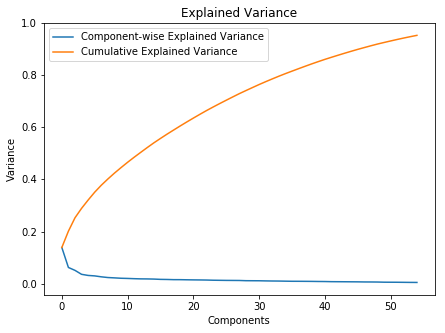

In [1138]:
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
ax.plot(range(X_pca.shape[1]), pca.explained_variance_ratio_, label='Component-wise Explained Variance')
ax.plot(range(X_pca.shape[1]), np.cumsum(pca.explained_variance_ratio_), label='Cumulative Explained Variance')
plt.title('Explained Variance')
plt.xlabel('Components')
plt.ylabel('Variance')
ax.legend()
plt.show()

### Linear Regression

In [1139]:
lr = linear_model.LinearRegression()
pipe = Pipeline([('pca', pca), ('linear', lr)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [1140]:
scores_train = cross_val_score(pipe, X_train, y_train, cv=5)
scores_test = cross_val_score(pipe, X_test, y_test, cv=5)
print('Cross Validation Scores - Training Set: \n{}'.format(scores_train))
print('\nAverage Cross Validation Score - Training Set: \n{:.2%}'.format(scores_train.mean()))
print('\nCross Validation Scores - Test Set: \n{}'.format(scores_train))
print('\nAverage Cross Validation Score - Test Set: \n{:.2%}'.format(scores_test.mean()))

# Calculate root mean squared error
rmse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))**0.5

# Print result
print('Root Mean Squared Error:\n{}'.format(rmse))

Cross Validation Scores - Training Set: 
[0.87208941 0.84418757 0.7806751  0.8441039  0.86005551]

Average Cross Validation Score - Training Set: 
84.02%

Cross Validation Scores - Test Set: 
[0.87208941 0.84418757 0.7806751  0.8441039  0.86005551]

Average Cross Validation Score - Test Set: 
72.61%
Root Mean Squared Error:
0.4570210334553902


### KNN Regression

In [1141]:
knn = neighbors.KNeighborsRegressor(n_neighbors=7, weights='distance', algorithm='auto')
pipe = Pipeline([('pca', pca), ('knn', knn)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [1142]:
scores_train = cross_val_score(pipe, X_train, y_train, cv=5)
scores_test = cross_val_score(pipe, X_test, y_test, cv=5)
print('Cross Validation Scores - Training Set: \n{}'.format(scores_train))
print('\nAverage Cross Validation Score - Training Set: \n{:.2%}'.format(scores_train.mean()))
print('\nCross Validation Scores - Test Set: \n{}'.format(scores_train))
print('\nAverage Cross Validation Score - Test Set: \n{:.2%}'.format(scores_test.mean()))

# Calculate root mean squared error
rmse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))**0.5

# Print result
print('Root Mean Squared Error:\n{}'.format(rmse))

Cross Validation Scores - Training Set: 
[0.72190707 0.6670871  0.63802632 0.59866867 0.68857193]

Average Cross Validation Score - Training Set: 
66.29%

Cross Validation Scores - Test Set: 
[0.72190707 0.6670871  0.63802632 0.59866867 0.68857193]

Average Cross Validation Score - Test Set: 
53.20%
Root Mean Squared Error:
0.608803837051414


### Random Forest Regression

In [1143]:
rfr = RandomForestRegressor(n_estimators=9, criterion='mse', max_depth=8)
pipe = Pipeline([('pca', pca), ('rfr', rfr)])
pipe.fit(X_train, y_train.values.ravel())
y_pred = pipe.predict(X_test)

In [1144]:
scores_train = cross_val_score(pipe, X_train, y_train.values.ravel(), cv=5)
scores_test = cross_val_score(pipe, X_test, y_test.values.ravel(), cv=5)
print('Cross Validation Scores - Training Set: \n{}'.format(scores_train))
print('\nAverage Cross Validation Score - Training Set: \n{:.2%}'.format(scores_train.mean()))
print('\nCross Validation Scores - Test Set: \n{}'.format(scores_train))
print('\nAverage Cross Validation Score - Test Set: \n{:.2%}'.format(scores_test.mean()))

# Calculate root mean squared error
rmse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))**0.5

# Print result
print('Root Mean Squared Error:\n{}'.format(rmse))

Cross Validation Scores - Training Set: 
[0.77341358 0.69389058 0.67620675 0.70998848 0.77364554]

Average Cross Validation Score - Training Set: 
72.54%

Cross Validation Scores - Test Set: 
[0.77341358 0.69389058 0.67620675 0.70998848 0.77364554]

Average Cross Validation Score - Test Set: 
59.05%
Root Mean Squared Error:
0.5319618143549292


### Ridge Regression

In [1145]:
rr = Ridge()
pipe = Pipeline([('pca', pca), ('ridge', rr)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [1146]:
scores_train = cross_val_score(pipe, X_train, y_train, cv=5)
scores_test = cross_val_score(pipe, X_test, y_test, cv=5)
print('Cross Validation Scores - Training Set: \n{}'.format(scores_train))
print('\nAverage Cross Validation Score - Training Set: \n{:.2%}'.format(scores_train.mean()))
print('\nCross Validation Scores - Test Set: \n{}'.format(scores_train))
print('\nAverage Cross Validation Score - Test Set: \n{:.2%}'.format(scores_test.mean()))

# Calculate root mean squared error
rmse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))**0.5

# Print result
print('Root Mean Squared Error:\n{}'.format(rmse))

Cross Validation Scores - Training Set: 
[0.8721049  0.84420952 0.78061565 0.84410179 0.86007169]

Average Cross Validation Score - Training Set: 
84.02%

Cross Validation Scores - Test Set: 
[0.8721049  0.84420952 0.78061565 0.84410179 0.86007169]

Average Cross Validation Score - Test Set: 
72.65%
Root Mean Squared Error:
0.4570192792436453


### Lasso Regression

In [1147]:
lasso = Lasso(alpha=0.0001, fit_intercept=True, max_iter=9)
pipe = Pipeline([('pca', pca), ('lasso', lasso)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [1148]:
scores_train = cross_val_score(pipe, X_train, y_train, cv=5)
scores_test = cross_val_score(pipe, X_test, y_test, cv=5)
print('Cross Validation Scores - Training Set: \n{}'.format(scores_train))
print('\nAverage Cross Validation Score - Training Set: \n{:.2%}'.format(scores_train.mean()))
print('\nCross Validation Scores - Test Set: \n{}'.format(scores_train))
print('\nAverage Cross Validation Score - Test Set: \n{:.2%}'.format(scores_test.mean()))

# Calculate root mean squared error
rmse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))**0.5

# Print result
print('Root Mean Squared Error:\n{}'.format(rmse))

Cross Validation Scores - Training Set: 
[0.87197939 0.84464882 0.78050591 0.84374574 0.85970556]

Average Cross Validation Score - Training Set: 
84.01%

Cross Validation Scores - Test Set: 
[0.87197939 0.84464882 0.78050591 0.84374574 0.85970556]

Average Cross Validation Score - Test Set: 
72.66%
Root Mean Squared Error:
0.45644992470380247


Our best model in this iteration was Lasso Regression with an average cross validation score (test set) of 72.66% and an RMSE of 0.45645.

## Conclusion
Overall, the first two iterations appeared to provide the best results. There was even a slight improvement in some of the models from iteration 1 to iteration 2, when we limited the feature set to the 20 most important features. However, there was a significant drop-off when we used a PCA that retained 95% of the variance. Thus, utilizing the feature importances appears to be most optimal way to model this dataset.